Extract paragraphs from myv wikipedia, and their Russian analogues, if possible.

In [3]:
import xmltodict

In [4]:
with open('wiki/myvwiki-20220601-pages-meta-current.xml', 'r') as f:
    raw = f.read()

In [5]:
struct = xmltodict.parse(raw)

In [7]:
struct['mediawiki'].keys()

odict_keys(['@xmlns', '@xmlns:xsi', '@xsi:schemaLocation', '@version', '@xml:lang', 'siteinfo', 'page'])

In [8]:
type(struct['mediawiki']['page'])

list

In [9]:
len(struct['mediawiki']['page'])

25587

In [10]:
import random

In [11]:
import requests
from bs4 import BeautifulSoup

# Experiments

In [44]:
def id2paragraphs(idx, lang='myv'):
    soup = BeautifulSoup(requests.get(f'https://{lang}.wikipedia.org/?curid={idx}').text)
    body = soup.find('div', {'id': 'bodyContent'})
    return [paragraph.text for paragraph in body.findAll('p')]
        
id2paragraphs(2348)

['1803 ие.\n']

In [47]:
page = struct['mediawiki']['page'][0]
page = random.choice(struct['mediawiki']['page'])
page
page['revision']['text']['#text']

'{{ЭТ\n |статус                  = веле\n |Эрзянь лем              = Тазино\n |оригинальное название   = {{Lang-ru|Тазино}}\n |изображение             = \n |подчинение              = \n |мастор                  = Россия\n |герб                    = \n |коцт                    = \n |описание герба          = \n |описание флага          = \n |ширина герба            = \n |ширина флага            = \n  |lat_dir = |lat_deg = 54|lat_min = 18|lat_sec = 36\n  |lon_dir = |lon_deg = 46|lon_min = 04|lon_sec = 46\n  |CoordAddon             = \n  |CoordScale             = \n |размер карты страны     = \n |размер карты региона    = \n |размер карты района     = \n |вид региона             = республикась\n |регион                  = Мордовия Республикась\n |регион в таблице        = Мордовия Республикась {{!}} Мордовия\n |вид района              = буе\n |район                   = Покш Килейбуе\n |район в таблице         = Покш Килейбуе\n |вид общины              = \n |община                  = \n |о

In [48]:
print(f'https://myv.wikipedia.org/?curid={page["id"]}')

https://myv.wikipedia.org/?curid=30816


In [49]:
for p in id2paragraphs(page['id']):
    print(p)

Тазино (руз. Тазино) — веле Покш Килейбуесэ, Мордовиясо.

Весероссиянь перепись населения (2002 ие)[3]:

Александровка • Айкино • Алу Парынз веле • Бозаев веле • Вейца веле • Гарт • Госагыр веле • Дягилевка веле • Елизаветинка • Красной Поляна веле • Кузым веле • Мариуполь • Марьяновка • Михайловка • Молния веле • Нерлей • Николаевка • Новые Пермиси • Парынзэле • Пермезь веле • Петровка • Присурский • Починки • Русские Найманы • Симкина веле • Симкинской Лесничества • Сосновый Гарт • Софьино • Специальный • Судось веле • Тазино • Ташто Найман веле • Шугур веле • Федоровка



In [79]:
page

OrderedDict([('title', 'Вильчинская, Стефания'),
             ('ns', '0'),
             ('id', '21275'),
             ('revision',
              OrderedDict([('id', '109863'),
                           ('parentid', '109853'),
                           ('timestamp', '2019-04-25T19:26:08Z'),
                           ('contributor',
                            OrderedDict([('username', 'Kawtaj'),
                                         ('id', '2727')])),
                           ('minor', None),
                           ('model', 'wikitext'),
                           ('format', 'text/x-wiki'),
                           ('text',
                            OrderedDict([('@bytes', '13306'),
                                         ('@xml:space', 'preserve'),
                                         ('#text',
                                          '{{Lomanes}}\n\n\'\'\'Стефа́ния Вильчи́нская\'\'\'\xa0({{lang-pl|\xa0Stefania Wilczyńska}};\xa0чачсь [[1886 ие]]нь [[панжиковонь 26

In [95]:
for i in range(10000):
    page = random.choice(struct['mediawiki']['page'])
    t = page['revision']['text']['#text']
    if len(t) > 5000:
        break
print(len(t))
print(t)

15863
Истя лиссь, меельце эрямо иетне монь ульнесть сюлмавозь эрзянь интернетэнь кепедстямонть марто, ансяк важодян теленевтемасо<ref> Теленевтема - рузкс «телевидение»</ref>, ды аволь эрзяньсесэнть. Кода появасть интернет-кулянь пачтямо керькстнэ<ref> Интернет-кулянь пачтямо керькст – руз. «интернет-СМИ»; тееви «куля» - новость, «пачтямо»-доносить, «керькс» - круг валтнэстэ</ref>, кармасть само кевкстемат, - эряви-арась теемс сынст эрзянь кельсэ?! А карман кортамо весе ломантнень кис, монь истямо кевкстема сась прязон. Карминь вешнеме интернет ванома систематнестэ<ref> Интернет ваннома системат - поисковые интернет системы (по-иному, просто «поиск»)</ref> – мезеяк арась. Эрзянь кельсэ сёрмадовкст арасельть. Кода кортыть, «валмеревксэнь чансть таркась чаво а ашти». Сестэ монь арсемам видестэ сёрмалемс кулят ды сёрмадовкст эрзянь кельсэ виевгадсь ды те кармась монь ёрокчинь тевекс. Ушодынь чизэнзэ весть максомо  кулят эрзянь келсэ рузонь «эрий журналсо», конань панжия Erzjanj Jurnal (ht

In [96]:
len(str(page['revision']['text']['#text']))

15863

In [97]:
page

OrderedDict([('title',
              'Тиринь келенть виензэ, али мезекс эрзятьнене эсист «Wij kepedi»-a?'),
             ('ns', '0'),
             ('id', '3017'),
             ('revision',
              OrderedDict([('id', '128516'),
                           ('parentid', '56588'),
                           ('timestamp', '2021-04-02T12:44:54Z'),
                           ('contributor',
                            OrderedDict([('username', 'Rueter'),
                                         ('id', '135')])),
                           ('minor', None),
                           ('comment', 'сёрмадома лув'),
                           ('model', 'wikitext'),
                           ('format', 'text/x-wiki'),
                           ('text',
                            OrderedDict([('@bytes', '28009'),
                                         ('@xml:space', 'preserve'),
                                         ('#text',
                                          'Истя лиссь, меель

In [36]:
print(page['revision']['text']['#text'])

<br />
{{ЭТ
 |статус                  = веле
 |Эрзянь лем              = Марезь веле
 |оригинальное название   = {{Lang-ru|с. Большое Маресево}}
 |изображение             = 
 |подчинение              = 
 |мастор                  = Россия
 |герб                    = 
 |коцт                    = 
 |описание герба          = 
 |описание флага          = 
 |ширина герба            = 
 |ширина флага            = 
  |lat_dir = |lat_deg = 54|lat_min = 21|lat_sec = 02
  |lon_dir = |lon_deg = 45|lon_min = 40|lon_sec = 09
  |CoordAddon             = 
  |CoordScale             = 
 |размер карты страны     = 
 |размер карты региона    = 
 |размер карты района     = 
 |вид региона             = республикась
 |регион                  = Мордовия Республикась
 |регион в таблице        = Мордовия Республикась {{!}} Мордовия
 |вид района              = буе
 |район                   = Чаунзабуе
 |район в таблице         = Чаунзабуе {{!}} Чаунзабуе
 |вид общины              = 
 |община                  = 

<title>Вильчинская, Стефания — Википедиясь</title>

In [101]:
soup = BeautifulSoup(requests.get('https://myv.wikipedia.org/wiki/Вильчинская,_Стефания').text)
soup.title

body = soup.find('div', {'id': 'bodyContent'})
for paragraph in body.findAll('p'):
    print(paragraph.text)
    print('---------')

Стефа́ния Вильчи́нская (пол.  Stefania Wilczyńska; чачсь 1886 иень панжиковонь 26 чистэ, Варшава ош, Российской империясь — кулось 1942 иень умарьковонь 6 чистэ, Треблинка) — эйкакшонь ваныця, тонавтыця, Януш Корчак марто вейсэ важодиця ды лездыця, совась маронзо ды эйкакш марто газонь камерас куломо.

---------
Стефания Вильчинская чачсь евреень раськенэ. Тетязо — коцтонь фабрикань кирдиця Юлиан (Исаак) Вильчинский (пол.  Izaak Wilczyński; ?—1911); авазо  — Саломея Вальфиш (пол.  Salomea Walfisz; ?—1929). Прядсь Ядвига Сикорскоень эсь школа (пол.  Jadwiga Sikorska;) Варшава ошсо, мейле естественной наукань факультет Бельгиянь Университетсэ, Льеж ошсо, 1906 иестэ тонавтнесь естественной наукат Женева ошонь Университетсэ, Швейцариясо[3][4][5].

---------
Варшавав велявтомадо мейле важодсь волонтёрокс еврей эйкакшонь уроз кудосо.  Уроз кудось аштесь ташто церкувасо, берянь кудосо. Вильчинская ладизе важодема лувонть ды ладязель прявт таркас. Тосо теевсь содавиксэкс 1909 иестэ  Януш Корча

# Cross-wiki links

In [135]:
with open('wiki/myvwiki-20220601-langlinks.sql', 'r') as f:
    rl = f.readlines()

In [138]:
rl[2][:1000]

'-- Host: db1166    Database: myvwiki\n'

In [146]:
for i, line in enumerate(rl):
    print(line[:100].strip())

-- MySQL dump 10.19  Distrib 10.3.34-MariaDB, for debian-linux-gnu (x86_64)
--
-- Host: db1166    Database: myvwiki
-- ------------------------------------------------------
-- Server version	10.4.22-MariaDB-log

/*!40101 SET @OLD_CHARACTER_SET_CLIENT=@@CHARACTER_SET_CLIENT */;
/*!40101 SET @OLD_CHARACTER_SET_RESULTS=@@CHARACTER_SET_RESULTS */;
/*!40101 SET @OLD_COLLATION_CONNECTION=@@COLLATION_CONNECTION */;
/*!40101 SET NAMES utf8mb4 */;
/*!40103 SET @OLD_TIME_ZONE=@@TIME_ZONE */;
/*!40103 SET TIME_ZONE='+00:00' */;
/*!40014 SET @OLD_UNIQUE_CHECKS=@@UNIQUE_CHECKS, UNIQUE_CHECKS=0 */;
/*!40014 SET @OLD_FOREIGN_KEY_CHECKS=@@FOREIGN_KEY_CHECKS, FOREIGN_KEY_CHECKS=0 */;
/*!40101 SET @OLD_SQL_MODE=@@SQL_MODE, SQL_MODE='NO_AUTO_VALUE_ON_ZERO' */;
/*!40111 SET @OLD_SQL_NOTES=@@SQL_NOTES, SQL_NOTES=0 */;

--
-- Table structure for table `langlinks`
--

DROP TABLE IF EXISTS `langlinks`;
/*!40101 SET @saved_cs_client     = @@character_set_client */;
/*!40101 SET character_set_client = utf8 */;

In [143]:
for i, line in enumerate(rl):
    if not line.startswith('INSERT'):
        continue
    print(i)
    print(line[:1000])
    break

38
INSERT INTO `langlinks` VALUES (3006,'aa','Category:Candidates for speedy deletion'),(863,'aa','Category:User de'),(1134,'aa','Category:User de-1'),(29,'aa','Category:Wikipedia'),(816,'aa','Template:Babel'),(2998,'aa','Template:Delete'),(5901,'aa','Template:FlowMention'),(6660,'aa','Template:LQT post imported with different signature user'),(837,'aa','Template:User en-3'),(987,'aa','Template:User es-2'),(855,'aa','Template:User fr'),(989,'aa','Template:User fr-1'),(1023,'aa','User:PipepBot'),(872,'aa','User:Purodha'),(1768,'aa','User:Taichi'),(3923,'aa','User:تفکر'),(363,'aa','Wikipedia'),(364,'aa','Wikipedia:Administrators'),(4170,'aa','Wikipedia:Babel'),(5620,'aa','Wikipedia:Community Portal'),(1241,'aa','user:Law soma'),(3133,'aa','user:OffsBlink'),(5191,'ab','1'),(251,'ab','1 (ахыԥхьаӡара)'),(241,'ab','10 (ахыԥхьаӡара)'),(640,'ab','100 (ахыԥхьаӡара)'),(4712,'ab','1000'),(682,'ab','1000 (ахыԥхьаӡара)'),(4711,'ab','1001'),(5053,'ab','1002'),(5054,'ab','1003'),(26282,'ab','1037'),(

In [144]:
len(rl[38])

846324

In [157]:
soup = BeautifulSoup(requests.get(f'https://myv.wikipedia.org/?curid=19250').text)
ru_button = soup.find('li', {'class': 'interlanguage-link interwiki-ru mw-list-item'})
print(ru_button.find('a')['href'])

https://ru.wikipedia.org/wiki/%D0%92%D0%B0%D0%B8_(%D0%9A%D1%80%D0%B8%D1%82)


# Full parsing

In [60]:
def get_content(soup):
    body = soup.find('div', {'id': 'bodyContent'})
    return [paragraph.text for paragraph in body.findAll('p')]

def parse_by_id(idx, lang='myv'):
    url = f'https://{lang}.wikipedia.org/?curid={idx}'
    soup = BeautifulSoup(requests.get(url).text)
    results = {
        'url': url,
        'content': get_content(soup)
    }
    ru_button = soup.find('li', {'class': 'interlanguage-link interwiki-ru mw-list-item'})
    if ru_button:
        ru_url = ru_button.find('a')['href']
        ru_soup = BeautifulSoup(requests.get(ru_url).text)
        results['ru_url'] = ru_url
        results['ru_content'] = get_content(ru_soup)
    return results


page = random.choice(struct['mediawiki']['page'])
print(f'https://myv.wikipedia.org/?curid={page["id"]}')
out = parse_by_id(page['id'])
print(out['content'][:3])
if out.get('ru_url'):
    print(out['ru_url'])
    print(out['ru_content'][:3])
else:
    print('no ru')

https://myv.wikipedia.org/?curid=2677
['Чадыковонь 2 чи — 92-це чи иенть (93-це високосной иетнесте) григорианонь ковкерьксенть. Иенть прядоманьте кадови 273 чить.\n', 'Вн. истяжо: Категория:Покшчить чадыковонь 2 чи\n', 'Вн. истяжо: Категория:Мезе ульнесь чадыковонь 2 чи\n']
https://ru.wikipedia.org/wiki/2_%D0%B0%D0%BF%D1%80%D0%B5%D0%BB%D1%8F
['2 апреля\xa0— 92-й день года (93-й в високосные годы) по григорианскому календарю.\nДо\xa0конца года остаётся 273 дня.\n', 'До 15 октября 1582 года\xa0— 2 апреля по юлианскому календарю, с 15 октября 1582 года\xa0— 2 апреля по григорианскому календарю.\n', 'В XX и XXI веках соответствует 20 марта по юлианскому календарю[1].\n']


In [61]:
from tqdm.auto import tqdm, trange

In [62]:
all_results = []
for page in tqdm(struct['mediawiki']['page']):
    all_results.append(parse_by_id(page['id']))

  0%|          | 0/25587 [00:00<?, ?it/s]

In [63]:
len(all_results)

25587

In [64]:
import json

In [66]:
with open('wiki/crawled.json', 'w') as f:
    json.dump(all_results, f, ensure_ascii=False)

# Sort pages by useful content

In [2]:
import fasttext
from collections import Counter

class LanguageDetector:
    def __init__(self, path="../langid/lid.323.bin"):
        self.model = fasttext.load_model(path)

    def predict_lang(self, text, k=10):
        text = text.replace('\n', '  ')
        langs, proba = self.model.predict(text, k=k)
        res = Counter(dict(zip([lang[9:] for lang in langs], proba)))
        for key in ['ru', 'myv']:
            if key not in res:
                res[key] = 0
        return res
    
LD = LanguageDetector()


In [3]:
import json
import random
from tqdm.auto import tqdm, trange
import re

In [4]:
with open('wiki/crawled.json', 'r') as f:
    all_results = json.load(f)

In [5]:
print(len(all_results))
print(len([r for r in all_results if 'ru_content' in r]))

25587
13209


In [176]:
good_results = {}
for item in tqdm(all_results):
    url = item['url']
    text = '\n\n'.join(item['content']).strip()
    text = re.sub('\[\d+\]', '', text)

    pars = []
    myv_scores = []
    ru_scores = []
    top_langs = []
    lens = []
    for p in text.split('\n\n'):
        p = p.strip()
        if len(p.strip()) < 3:
            continue
        if (p.count('•') + p.count('·') + p.count('|')) / len(p) > 0.05:
            continue
        if not re.match('.*[а-яё].*', p.lower(), re.DOTALL):
            continue
        pars.append(p)
        langs = LD.predict_lang(p)
        myv_scores.append(langs['myv'])
        ru_scores.append(langs['ru'])
        top_langs.append(langs.most_common(1)[0][0])
        lens.append(len(p))
    
    good_pars = '\n\n'.join([p for i, p in enumerate(pars) if top_langs[i] == 'myv'])
    
    if good_pars.startswith('Те категориясонть') or 'Неть лопатне кандовить те категориянтень' in good_pars:
        continue
    
    if good_pars:
        good_results[url] = good_pars
        
print(len(good_results))

  0%|          | 0/25587 [00:00<?, ?it/s]

12644


In [186]:
url = random.choice(list(good_results.keys()))
print(url)
text = good_results[url]
print(text)


https://myv.wikipedia.org/?curid=99
Все-таки правильнее написань Ветькень кель, вместо чувашонь кель! Erzianj jurnalist 20:48, 31 October 2007 (UTC)


In [178]:
from collections import Counter

In [181]:
Counter(good_results.values()).most_common(5)

[('← ЛОпаПарцун:ПозКарта', 84),
 ('Кучомс седе тов:', 30),
 ('Чарькодевтемасо ильведевкс: пунктуациянь апак содань тешкс «{».', 15),
 ('рузонь велеть:\n\nтатаронь велеть:\n\nАдминистрациянь куншка таркась: Казань \nОштне: Казань\xa0•',
  14),
 ('04:41, 17 Чадыковонь 2015 (UTC)', 11)]

In [187]:
with open('wiki/clean_myv.json', 'w') as f:
    json.dump(good_results, f, ensure_ascii=False)

# extract semi-aligned texts

In [6]:
with open('wiki/clean_myv.json', 'r') as f:
    good_results = json.load(f)

In [7]:
len(good_results)

12644

In [11]:
url2item = {item['url']: item for item in all_results}

In [13]:
candidates = list({k for k, v in good_results.items() if 'ru_content' in url2item[k]})
len(candidates)

8376

In [31]:
import razdel

In [28]:
def get_good_text(paragraphs, target_language='ru'):
    text = '\n\n'.join(paragraphs).strip()
    text = re.sub('\[\d+\]', '', text)

    pars = []
    top_langs = []
    for p in text.split('\n\n'):
        p = p.strip().replace('\xa0', ' ')
        if len(p.strip()) < 3:
            return
        if (p.count('•') + p.count('·') + p.count('|')) / len(p) > 0.05:
            return
        if not re.match('.*[а-яё].*', p.lower(), re.DOTALL):
            return
        pars.append(p)
        langs = LD.predict_lang(p)
        top_langs.append(langs.most_common(1)[0][0])
    
    good_pars = '\n\n'.join([p for i, p in enumerate(pars) if top_langs[i] == target_language])
    
    if good_pars.startswith('Те категориясонть') or 'Неть лопатне кандовить те категориянтень' in good_pars:
        return
    
    return good_pars

In [48]:
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
from razdel import sentenize, tokenize
import json 
import re
import random
from tqdm.auto import tqdm, trange

In [203]:
import torch
from transformers import AutoTokenizer, AutoModel
mname = 'labse_erzya_v0'
tokenizer = AutoTokenizer.from_pretrained(mname)
model = AutoModel.from_pretrained(mname)

Some weights of the model checkpoint at labse_erzya_v0 were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [323]:
model.cuda();

In [326]:
def embed(text):
    encoded_input = tokenizer(text, padding=True, truncation=True, max_length=128, return_tensors='pt')
    with torch.inference_mode():
        model_output = model(**encoded_input.to(model.device))
    embeddings = model_output.pooler_output
    embeddings = torch.nn.functional.normalize(embeddings)
    return embeddings[0].cpu().numpy()

In [51]:
def center_norm(v):
    v = v - v.mean(0)
    return v /  (v**2).sum(1, keepdims=True) ** 0.5


def center_dot(x, y):
    m = (x.sum(0) + y.sum(0)) / (x.shape[0] + y.shape[0])
    x = x - m
    y = y - m
    x =  x /  (x**2).sum(1, keepdims=True) ** 0.5
    y =  y /  (y**2).sum(1, keepdims=True) ** 0.5
    return np.dot(x, y.T)

In [52]:
def get_top_mean_by_row(x, k=5):
    m, n = x.shape
    k = min(k, n)
    topk_indices = np.argpartition(x, -k, axis=1)[:, -k:]
    rows, _ = np.indices((m, k))
    return x[rows, topk_indices].mean(1)

In [328]:
def align3(sims):
    
    #sims = np.dot(center_norm(orig_vecs), center_norm(sum_vecs).T) ** 3
    #sims = center_dot(orig_embeds, sum_embeds) #** 3

    rewards = np.zeros_like(sims)
    choices = np.zeros_like(sims).astype(int)  # 1: choose this pair, 2: decrease i, 3: decrease j

    # алгоритм, разрешающий пропускать сколько угодно пар, лишь бы была монотонность
    for i in range(sims.shape[0]):
        for j in range(0, sims.shape[1]):
            # вариант первый: выровнять i-тое предложение с j-тым
            score_add = sims[i, j]
            if i > 0 and j > 0:  # вот как тогда выровняются предыдущие 
                score_add += rewards[i-1, j-1]
                choices[i, j] = 1
            best = score_add
            if i > 0 and rewards[i-1, j] > best:
                best = rewards[i-1, j]
                choices[i, j] = 2
            if j > 0 and rewards[i, j-1] > best:
                best = rewards[i, j-1]
                choices[i, j] = 3
            rewards[i, j] = best
    alignment = []
    i = sims.shape[0] - 1
    j = sims.shape[1] - 1
    while i > 0 and j > 0:
        if choices[i, j] == 1:
            alignment.append([i, j])
            i -= 1
            j -= 1
        elif choices[i, j] == 2:
            i -= 1
        else:
            j -= 1
    return alignment[::-1]

In [308]:
url = random.choice(candidates)
print(url)
print(url2item[url]['ru_url'])

https://myv.wikipedia.org/?curid=7742
https://ru.wikipedia.org/wiki/%D0%91%D1%83%D0%B7%D0%B4%D1%8F%D0%BA%D1%81%D0%BA%D0%B8%D0%B9_%D1%80%D0%B0%D0%B9%D0%BE%D0%BD


In [309]:
good_results[url]

'Буздяконь буе (руз. Буздякский район, баш. Бүздәк районы)\xa0— те муниципальной буе Башкириясо, Россиясо.\nКуншка таркась\xa0— Буздяк веле.\n\n2010 иень Ловнома-сёрмадстоманть коряс:печкаст\xa0— 60,2\xa0%, башкирт\xa0— 30,4\xa0%, рузт\xa0— 7,4\xa0%, лия раськень ломанть\xa0— 2\xa0%.'

Проблема: сентенайзеры плохо справляются с сокращениями из Википедии. 

In [310]:
sents_er = [s.text for p in good_results[url].split('\n') for s in razdel.sentenize(p)  if s.text]

In [311]:
sents_ru = [s.text for p in get_good_text(url2item[url]['ru_content']).split('\n') for s in razdel.sentenize(p)  if s.text]

In [312]:
#from nltk import sent_tokenize
#sents_er = [s for p in good_results[url].split('\n') for s in sent_tokenize(p)  if s]

In [313]:
sents_er

['Буздяконь буе (руз.',
 'Буздякский район, баш.',
 'Бүздәк районы)\xa0— те муниципальной буе Башкириясо, Россиясо.',
 'Куншка таркась\xa0— Буздяк веле.',
 '2010 иень Ловнома-сёрмадстоманть коряс:печкаст\xa0— 60,2\xa0%, башкирт\xa0— 30,4\xa0%, рузт\xa0— 7,4\xa0%, лия раськень ломанть\xa0— 2\xa0%.']

In [314]:
print(len(sents_ru), len(sents_er))

21 5


In [315]:
emb_ru = np.stack([embed(s) for s in tqdm(sents_ru)])
emb_er = np.stack([embed(s) for s in tqdm(sents_er)])

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

In [316]:
pen = np.array([[min(len(x), len(y)) / max(len(x), len(y)) for x in sents_er] for y in sents_ru])
sims = np.maximum(0, np.dot(emb_ru, emb_er.T)) ** 1 * pen

alpha = 0.2
penalty = 0.2
sims_rel = (sims.T - get_top_mean_by_row(sims) * alpha).T - get_top_mean_by_row(sims.T) * alpha - penalty

alignment = align3(sims_rel)

print(sum(sims[i, j] for i, j in alignment) / min(sims.shape))

  0%|          | 0/21 [00:00<?, ?it/s]

0.2561277001576516


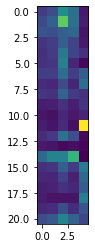

In [317]:
plt.imshow(sims_rel)

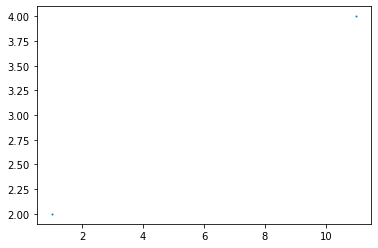

In [318]:
plt.scatter(*list(zip(*alignment)), s=1);

Какие значения sim хороши?
* 75%+ - ок
* 40%- неоч, 45% - на грании

Какие значения общего скора хороши?
* 37% - норм
* 12% - неоч

In [319]:
for i, j in alignment:
    print(sents_ru[i])
    print(sents_er[j])
    print(sims[i, j])
    print('-')

Район находится в западной части Республики Башкортостан.
Бүздәк районы) — те муниципальной буе Башкириясо, Россиясо.
0.5667566050917415
-
Согласно Всероссийской переписи населения 2010 года: татары — 60,2 %, башкиры — 30,4 %, русские — 7,4 %, лица других национальностей — 2 %.
2010 иень Ловнома-сёрмадстоманть коряс:печкаст — 60,2 %, башкирт — 30,4 %, рузт — 7,4 %, лия раськень ломанть — 2 %.
0.7138818956965165
-


In [332]:
wiki_pairs = []

In [333]:
tq = tqdm(candidates)
for url in tq:
    ru_text = get_good_text(url2item[url]['ru_content'])
    if not ru_text: 
        continue
    sents_er = [s.text for p in good_results[url].split('\n') for s in razdel.sentenize(p)  if s.text]
    sents_ru = [s.text for p in ru_text.split('\n') for s in razdel.sentenize(p)  if s.text]
    
    emb_ru = np.stack([embed(s) for s in sents_ru])
    emb_er = np.stack([embed(s) for s in sents_er])
    
    pen = np.array([[min(len(x), len(y)) / max(len(x), len(y)) for x in sents_er] for y in sents_ru])
    sims = np.maximum(0, np.dot(emb_ru, emb_er.T)) ** 1 * pen

    alpha = 0.2
    penalty = 0.2
    sims_rel = (sims.T - get_top_mean_by_row(sims) * alpha).T - get_top_mean_by_row(sims.T) * alpha - penalty

    alignment = align3(sims_rel)

    total_score = sum(sims[i, j] for i, j in alignment) / min(sims.shape)
    if total_score < 0.15:
        continue
    
    for i, j in alignment:
        if sims[i, j] >= 0.50: # порог высоковат; часть предложений мы потеряем, но полученные зато будут чистыми
            wiki_pairs.append([sents_er[j], sents_ru[i]])
    tq.set_description(str(len(wiki_pairs)))

  0%|          | 0/8376 [00:00<?, ?it/s]

In [343]:
for p in wiki_pairs:
    p[0] = p[0].replace('\xa0', ' ')

In [410]:
random.choice(wiki_pairs)

['Ульнесь важодиця-полакс Орсона Уэллсаамерикань актёронть.',
 'Была партнером по работе американского актера Орсона Уэллса.']

In [411]:
with open('wiki/myv_ru_aligned.json', 'w') as f:
    json.dump(wiki_pairs, f, ensure_ascii=False)